# Loading Libraries

In [39]:
# Data manipulation and analysis
import pandas as pd  # Library for data manipulation and analysis, especially for tabular data (DataFrames)
import numpy as np  # Library for numerical computing, especially arrays and matrix operations

# Visualization
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # High-level interface for drawing attractive statistical graphics
import cartopy.crs as ccrs  # Library for map projections and geographic data visualizations
import cartopy.feature as cfeature  # Used to add features (e.g., coastlines, borders) to cartopy maps
import matplotlib.cm as cm  # Colormap utilities from Matplotlib

# Machine learning models and utilities
from sklearn.preprocessing import LabelEncoder, RobustScaler, PowerTransformer  # Data preprocessing utilities
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate  # Model evaluation and splitting datasets
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  # Hyperparameter tuning using search algorithms
from sklearn.cluster import KMeans  # K-Means clustering algorithm
#import xgboost as xgb # XGBoost algorithm for gradient boosting
from sklearn.linear_model import Ridge, ElasticNet  # Linear regression models (Ridge and ElasticNet)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor  # Ensemble models for regression
from sklearn.svm import SVR  # Support Vector Regressor (SVR) for regression tasks
from sklearn.tree import DecisionTreeRegressor  # Decision Tree model for regression tasks
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics for regression models
#from xgboost import XGBRegressor  # XGBoost algorithm for gradient boosting
#from lightgbm import LGBMRegressor  # LightGBM algorithm for gradient boosting
from catboost import CatBoostRegressor  # CatBoost algorithm for gradient boosting

# Progress bar for loops
from tqdm import tqdm  # Progress bar utility for iterating through loops

# Display DataFrames in Jupyter Notebooks
from IPython.display import display  # Allows displaying objects like DataFrames in Jupyter Notebook


# Statistical modeling and hypothesis testing
import statsmodels.api as sm  # Library for statistical models and hypothesis testing
import scipy.stats as stats  # Library for statistical functions
from scipy.stats import pearsonr  # Pearson correlation coefficient calculation

# Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')  # Suppresses warnings to keep output cleaner

In [17]:
df = pd.read_csv('/Users/amulya/Desktop/Elsewhere/me/Work/Hackathons/Numhack/Temperature-and-Coral-Bleaching/notebooks/Cleaned_Coral_Data.csv')

In [18]:
df

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Depth_m,...,Windspeed,SSTA,SSTA_Maximum,SSTA_Frequency,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW,Date
0,23.1630,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,0.0287,49.90,10.00,...,8.0,-0.46,2.24,0.0,0.00,-0.80,1.83,0.00,0.00,2005-09-15
1,-17.5750,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,0.0262,51.20,14.00,...,2.0,1.29,3.10,0.5,0.26,1.29,3.00,0.25,0.26,1991-03-15
2,18.3690,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,0.0429,61.52,7.00,...,8.0,0.04,2.83,16.0,0.00,-2.64,2.31,7.00,0.00,2006-01-15
3,17.7600,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,0.0424,65.39,9.02,...,3.0,-0.07,2.47,22.0,0.00,-2.27,2.19,3.00,0.00,2006-04-15
4,17.7690,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,0.0424,65.39,12.50,...,3.0,0.00,2.30,16.0,0.00,-2.19,1.87,3.00,0.00,2006-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26823,-3.2600,40.1500,Indian,Western Indo-Pacific,Kenya and Tanzania coast,1982.59,Sheltered,0.1505,42.73,1.50,...,5.0,1.06,7.58,14.0,5.46,1.06,6.32,4.00,3.42,2016-04-12
26824,-3.2600,40.1500,Indian,Western Indo-Pacific,Kenya and Tanzania coast,1982.59,Sheltered,0.1505,42.73,2.00,...,7.0,-0.37,7.58,15.0,7.62,-1.28,6.32,4.00,4.48,2016-05-19
26825,-8.3651,116.0844,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,91.31,Sheltered,0.0372,47.39,5.60,...,8.0,-0.48,3.29,1.0,2.24,-0.82,2.76,1.00,2.09,2019-05-28
26826,-8.3473,116.0503,Pacific,Central Indo-Pacific,Lesser Sunda Islands and Savu Sea,129.08,Sheltered,0.0849,47.39,3.50,...,7.0,0.10,3.52,1.0,2.14,-0.09,2.86,1.00,2.00,2019-05-16


# Feature Engineering

### Interaction Features

In this step, we first make a copy of the original dataset to avoid modifying it. Then, we extract the year, month, and day from the `Date` column and drop the `Date` column afterward. This helps us treat the date as a feature without keeping the raw date format.

In [19]:
# Copy the data to a new variable for model building to avoid modifying the original data
data_for_model = df.copy()

# Extract year, month, and day from the Date
data_for_model['Year'] = pd.to_datetime(data_for_model['Date']).dt.year
data_for_model['Month'] = pd.to_datetime(data_for_model['Date']).dt.month
data_for_model['Day'] = pd.to_datetime(data_for_model['Date']).dt.day

# Drop the Date column
data_for_model.drop('Date', axis=1, inplace=True)

# Display the first few rows to verify changes
data_for_model.head()

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Depth_m,...,SSTA_Maximum,SSTA_Frequency,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW,Year,Month,Day
0,23.163,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,0.0287,49.90,10.00,...,2.24,0.0,0.00,-0.80,1.83,0.00,0.00,2005,9,15
1,-17.575,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,0.0262,51.20,14.00,...,3.10,0.5,0.26,1.29,3.00,0.25,0.26,1991,3,15
2,18.369,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,0.0429,61.52,7.00,...,2.83,16.0,0.00,-2.64,2.31,7.00,0.00,2006,1,15
3,17.760,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,0.0424,65.39,9.02,...,2.47,22.0,0.00,-2.27,2.19,3.00,0.00,2006,4,15
4,17.769,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,0.0424,65.39,12.50,...,2.30,16.0,0.00,-2.19,1.87,3.00,0.00,2006,4,15


Here, we create interaction terms between some of the key environmental features like `SST (Sea Surface Temperature)` and `TSA (Temperature Stress Anomaly)`. These interaction terms may help capture combined effects of temperature-related factors on coral bleaching.

In [21]:
# Add interaction terms between environmental stressors
# Interaction of Sea Surface Temperature (SST) and Temperature Stress Anomaly (TSA)
data_for_model['SST_TSA_Interaction'] = data_for_model['SST'] * data_for_model['TSA']

# Interaction between SSTA (Sea Surface Temperature Anomaly) and Depth
data_for_model['SSTA_Depth_Interaction'] = data_for_model['SSTA'] * data_for_model['Depth_m']

# Display the first few rows to verify changes
data_for_model.head()

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Depth_m,...,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW,Year,Month,Day,SST_TSA_Interaction,SSTA_Depth_Interaction
0,23.163,-82.5260,Atlantic,Tropical Atlantic,Cuba and Cayman Islands,8519.23,Exposed,0.0287,49.90,10.00,...,0.00,-0.80,1.83,0.00,0.00,2005,9,15,-241.6400,-4.6000
1,-17.575,-149.7833,Pacific,Eastern Indo-Pacific,Society Islands French Polynesia,1431.62,Exposed,0.0262,51.20,14.00,...,0.26,1.29,3.00,0.25,0.26,1991,3,15,391.2570,18.0600
2,18.369,-64.5640,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,182.33,Exposed,0.0429,61.52,7.00,...,0.00,-2.64,2.31,7.00,0.00,2006,1,15,-789.8352,0.2800
3,17.760,-64.5680,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,313.13,Exposed,0.0424,65.39,9.02,...,0.00,-2.27,2.19,3.00,0.00,2006,4,15,-680.1147,-0.6314
4,17.769,-64.5830,Atlantic,Tropical Atlantic,Hispaniola Puerto Rico and Lesser Antilles,792.00,Exposed,0.0424,65.39,12.50,...,0.00,-2.19,1.87,3.00,0.00,2006,4,15,-656.3430,0.0000


### Encode Categorical Variables

In this step, we encode the categorical columns using `LabelEncoder`. This transforms the non-numeric features like `Ocean_Name` and `Bleaching_Level` into numerical labels, which are necessary for machine learning models.

In [22]:
# Encoding categorical columns
label_encoders = {}
categorical_columns = ['Ocean_Name', 'Realm_Name', 'Ecoregion_Name', 'Exposure', 'Bleaching_Level']

for col in categorical_columns:
    le = LabelEncoder()
    data_for_model[col] = le.fit_transform(data_for_model[col])
    label_encoders[col] = le  # Save the encoder for potential inverse transformation

# Display the first few rows to verify changes
data_for_model.head()

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Depth_m,...,SSTA_DHW,TSA,TSA_Maximum,TSA_Frequency,TSA_DHW,Year,Month,Day,SST_TSA_Interaction,SSTA_Depth_Interaction
0,23.163,-82.5260,1,6,26,8519.23,0,0.0287,49.90,10.00,...,0.00,-0.80,1.83,0.00,0.00,2005,9,15,-241.6400,-4.6000
1,-17.575,-149.7833,3,1,89,1431.62,0,0.0262,51.20,14.00,...,0.26,1.29,3.00,0.25,0.26,1991,3,15,391.2570,18.0600
2,18.369,-64.5640,1,6,43,182.33,0,0.0429,61.52,7.00,...,0.00,-2.64,2.31,7.00,0.00,2006,1,15,-789.8352,0.2800
3,17.760,-64.5680,1,6,43,313.13,0,0.0424,65.39,9.02,...,0.00,-2.27,2.19,3.00,0.00,2006,4,15,-680.1147,-0.6314
4,17.769,-64.5830,1,6,43,792.00,0,0.0424,65.39,12.50,...,0.00,-2.19,1.87,3.00,0.00,2006,4,15,-656.3430,0.0000


### Environmental Clustering

We cluster geographical and environmental features (like `Depth_m` and `Distance_to_Shore`) using K-Means clustering. This creates new feature groups based on the similarity of coral environments, which can help the model identify clusters with similar characteristics.

In [28]:
# Clustering of environmental features: Combining Depth and Distance to Shore
geo_env_features = data_for_model[['Depth_m', 'Distance_to_Shore']]
kmeans_env = KMeans(n_clusters=4, random_state=42)
data_for_model['Geo_Env_Cluster'] = kmeans_env.fit_predict(geo_env_features)


We apply K-Means clustering to the geographical features (Latitude_Degrees and Longitude_Degrees) to create Geo_Cluster. This can help group coral sites based on their geographic locations.

In [26]:
# Apply K-Means clustering on geographical features (Latitude and Longitude)
geo_features = data_for_model[['Latitude_Degrees', 'Longitude_Degrees']]
kmeans = KMeans(n_clusters=5, random_state=42)
data_for_model['Geo_Cluster'] = kmeans.fit_predict(geo_features)


### Scale and Normalize Numerical Features

In this step, we first normalize the numerical columns using the PowerTransformer to handle skewness in the data. Then, we apply the `RobustScaler` to handle outliers effectively by scaling the data based on interquartile range (IQR).

In [29]:
# Select only the numerical columns for scaling
numerical_columns = data_for_model.select_dtypes(include=['float64', 'int64']).columns

# Apply Power Transformation to normalize the data distribution
pt = PowerTransformer(method='yeo-johnson')
data_for_model[numerical_columns] = pt.fit_transform(data_for_model[numerical_columns])

# Apply RobustScaler to handle outliers
scaler = RobustScaler()
data_for_model[numerical_columns] = scaler.fit_transform(data_for_model[numerical_columns])

# Display the first few rows to verify changes
data_for_model.head()

,Latitude_Degrees,Longitude_Degrees,Ocean_Name,Realm_Name,Ecoregion_Name,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Depth_m,...,TSA_Maximum,TSA_Frequency,TSA_DHW,Year,Month,Day,SST_TSA_Interaction,SSTA_Depth_Interaction,Geo_Env_Cluster,Geo_Cluster
0,0.574310,-0.619260,-0.523722,0.000000,-0.247117,0.877960,-1.0,-0.633859,-0.182424,0.565964,...,-1.124414,-0.576329,0.000000,2005,9,15,-0.060917,-1.114618,3,3
1,-0.876804,-0.984312,0.476278,-0.815388,0.498364,0.295920,-1.0,-0.713303,-0.031011,1.025929,...,0.543869,-0.371057,0.730315,1991,3,15,1.424161,2.570383,3,1
2,0.262027,-0.519774,-0.523722,0.000000,0.000000,-0.470949,-1.0,-0.226693,1.062954,0.134251,...,-0.304858,0.741502,0.000000,2006,1,15,-0.922932,-0.160490,0,3
3,0.225369,-0.519797,-0.523722,0.000000,0.000000,-0.259287,-1.0,-0.239841,1.432660,0.435335,...,-0.487938,0.423671,0.000000,2006,4,15,-0.756747,-0.327400,0,3
4,0.225906,-0.519880,-0.523722,0.000000,0.000000,0.086534,-1.0,-0.239841,1.432660,0.865130,...,-1.046314,0.423671,0.000000,2006,4,15,-0.720409,-0.210798,3,3


### Rolling Averages for Time Series Effects

We introduce rolling averages for features like `SST`, `SST Maximum`, and `Cyclone Frequency` to capture the effect of past values on coral bleaching. This is especially useful for capturing temporal dependencies in the data.

In [31]:
# Create rolling averages for SST, SST Maximum, and Cyclone Frequency (rolling average over 3 months)
data_for_model['SST_RollingAvg'] = data_for_model['SST'].rolling(window=3).mean().fillna(data_for_model['SST'])
data_for_model['SST_Max_RollingAvg'] = data_for_model['SST_Maximum'].rolling(window=3).mean().fillna(data_for_model['SST_Maximum'])
data_for_model['CycloneFreq_RollingAvg'] = data_for_model['Cyclone_Frequency'].rolling(window=3).mean().fillna(data_for_model['Cyclone_Frequency'])


### Define Features (X) and Target Variable (y), and Split the Data

Finally, we define the features (X) and target variable (y), and split the dataset into training and testing sets to prepare it for model building.

In [32]:
# Define the features (X) and the target variable (y)
X = data_for_model.drop(columns=['Percent_Bleaching'])  # Drop the target variable from the features
y = data_for_model['Percent_Bleaching']  # Set the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets to verify the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21462, 32), (5366, 32), (21462,), (5366,))

# Model Training and Tuning

After completing the data preprocessing, the next critical step is selecting appropriate regression models to predict our target variable, **Percent Bleaching**. We have chosen a diverse set of regression models that represent both linear and non-linear relationships, simple and complex architectures, and models that incorporate regularization and ensemble techniques to reduce overfitting and improve predictive performance.

***Why These Models?***

We have selected a range of models to evaluate, each offering unique strengths for different types of data and prediction tasks:

1. **Ridge Regression**: A linear regression model with L2 regularization. It helps prevent overfitting by shrinking the coefficients, particularly useful when dealing with multicollinearity or high-dimensional data.
   
2. **Elastic Net Regression**: A hybrid of Ridge and Lasso regression, combining L1 and L2 regularization to balance between penalizing large coefficients and feature selection, making it effective in high-dimensional datasets.

3. **Random Forest Regression**: An ensemble method that builds multiple decision trees and averages their predictions. This model reduces overfitting while capturing non-linear relationships and interactions between variables. It’s robust to noise and effective on both small and large datasets.

4. **Support Vector Regression (SVR)**: A non-linear model that uses kernel tricks to handle complex relationships between features and the target variable. SVR is ideal for smaller datasets where precise decision boundaries are critical.

5. **Decision Tree Regression**: A simple, interpretable model that splits data based on feature values. It is suitable for modeling non-linear relationships and interactions between variables but can overfit without proper tuning, hence included with limited depth.

6. **CatBoost Regressor**: A gradient boosting model specifically designed for categorical features, providing automatic handling of categorical variables without explicit encoding. It's fast, robust, and highly effective for structured datasets.

7. **AdaBoost Regressor**: Another ensemble technique that combines multiple weak learners to create a strong model. It assigns higher weights to incorrectly predicted observations in subsequent rounds, helping to improve overall prediction accuracy.

By evaluating this diverse set of models, we aim to identify the one that delivers the best balance between accuracy, interpretability, and computational efficiency for predicting **Percent Bleaching**. We expect different models to perform better depending on the complexity of relationships within the dataset. This approach allows us to compare linear, regularized, non-linear, and ensemble models to ensure we capture both simple and complex patterns in the data.


In [33]:
# Define a set of regression models with relevant hyperparameters
models = {
    # Ridge Regression: L2 regularization to prevent overfitting, with alpha controlling the penalty strength
    'Ridge Regression': Ridge(alpha=1.0),
    
    # ElasticNet Regression: Combination of L1 (Lasso) and L2 (Ridge) regularization with specified alpha and ratio
    'Elastic Net Regression': ElasticNet(alpha=0.01, l1_ratio=0.5),
    
    # Random Forest Regression: Ensemble of decision trees, with controlled depth and regularization to prevent overfitting
    'Random Forest Regression': RandomForestRegressor(
        n_estimators=100,  # Number of trees in the forest
        max_depth=10,  # Maximum depth of the trees
        min_samples_split=10,  # Minimum samples required to split an internal node
        min_samples_leaf=4,  # Minimum samples required at a leaf node
        random_state=42  # Ensure reproducibility
    ),
    
    # Support Vector Regression (SVR): Regression technique based on support vector machines, effective in high-dimensional spaces
    'Support Vector Regression (SVR)': SVR(C=1.0, epsilon=0.1),  # C controls trade-off, epsilon defines the margin
    
    # Decision Tree Regression: Simple decision tree, controlled with depth and minimum samples to prevent overfitting
    'Decision Tree Regression': DecisionTreeRegressor(
        max_depth=6,  # Limit the depth to control model complexity
        min_samples_split=10,  # Minimum number of samples required to split
        min_samples_leaf=4,  # Minimum number of samples at a leaf node
        random_state=42  # Ensure reproducibility
    ),
       
    # CatBoost Regressor: Gradient boosting on decision trees with efficient handling of categorical features
    'CatBoost Regressor': CatBoostRegressor(
        verbose=0,  # Suppress training output
        depth=6,  # Maximum depth of trees
        learning_rate=0.01,  # Learning rate for step size shrinkage
        random_state=42  # Ensure reproducibility
    ),
    
    # AdaBoost Regressor: Adaptive boosting that adjusts weights of misclassified instances
    'AdaBoost Regressor': AdaBoostRegressor(
        n_estimators=100,  # Number of boosting stages
        learning_rate=0.01,  # Learning rate for weight updates
        random_state=42  # Ensure reproducibility
    )
}

After selecting a set of models for predicting the target variable, the next step is to evaluate their performance using cross-validation. Cross-validation is a robust method for assessing how well models generalize to unseen data. In this section, we use 5-fold cross-validation to evaluate each model across multiple scoring metrics. Here’s an overview of the process:

1. **Performance Metrics**:  
   To evaluate the models, we use a range of metrics:
   - **MSE (Mean Squared Error)**: Measures the average squared difference between predicted and actual values. Lower values indicate better performance.
   - **RMSE (Root Mean Squared Error)**: The square root of MSE, which provides an interpretable metric in the original unit of the target variable.
   - **MAE (Mean Absolute Error)**: Measures the average absolute difference between predicted and actual values, providing another view of prediction accuracy.
   - **R² Score**: Measures the proportion of variance in the target variable that the model explains. Higher values are better, with a value of 1 indicating perfect predictions.

2. **Cross-Validation Process**:  
   The function `cross_validate_model` performs cross-validation for each model, calculating the mean and standard deviation of the scoring metrics. Negative errors (MSE, MAE, MAPE) are negated to convert them back to positive values for interpretation.

3. **Model Evaluation**:  
   The `tqdm` library is used to visually track progress as the cross-validation loop evaluates each model. After completing the evaluations, the results are stored in a DataFrame for easy comparison.

4. **Result Analysis**:  
   The models are ranked based on their **R² Score**, which helps identify the best-performing model. A summary of performance metrics, including MSE, RMSE, MAE, and MAPE, is provided for each model. Finally, the best model is printed along with its associated metrics.

In this process, we identify the model that best fits the training data, while avoiding overfitting by leveraging cross-validation and evaluating multiple performance metrics.

In [36]:
# Initialize a list to store the results
cv_results = []

# Define scoring metrics for cross-validation
scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

# Function to perform cross-validation and collect model performance
def cross_validate_model(name, model, X_train, y_train, cv=5):
    # Perform cross-validation
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    
    # Calculate mean scores (negate the negative errors to make them positive)
    mse = -np.mean(scores['test_MSE'])
    rmse = np.sqrt(mse)
    mae = -np.mean(scores['test_MAE'])
    r2 = np.mean(scores['test_R2'])
    
    # Append the results as a dictionary
    cv_results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2
    })

# Train and evaluate each model with cross-validation
for name, model in tqdm(models.items(), desc="Model Evaluation"):
    cross_validate_model(name, model, X_train, y_train, cv=5)  # Perform 5-fold cross-validation

# Convert the results list to a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Sort the DataFrame by the R² Score in descending order (higher is better)
cv_results_df.sort_values(by='R² Score', ascending=False, inplace=True)

# Display the cross-validation results as a formatted table using pandas
print("\nCross-Validation Model Performance Summary:\n")
cv_results_df.set_index('Model', inplace=True)
print(cv_results_df.to_markdown())

# Print the best model based on R² Score
best_cv_model = cv_results_df.iloc[0]
print(f"\n\033[1mBest Model: {best_cv_model.name}\033[0m")
print(f"  - R² Score: {best_cv_model['R² Score']:.4f}")
print(f"  - MSE: {best_cv_model['MSE']:.4f}")
print(f"  - RMSE: {best_cv_model['RMSE']:.4f}")
print(f"  - MAE: {best_cv_model['MAE']:.4f}")

Model Evaluation: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:29<00:00,  4.24s/it]


Cross-Validation Model Performance Summary:

| Model                           |       MSE |     RMSE |      MAE |   R² Score |
|:--------------------------------|----------:|---------:|---------:|-----------:|
| Random Forest Regression        | 0.0685411 | 0.261804 | 0.197796 |  0.704781  |
| CatBoost Regressor              | 0.0794082 | 0.281795 | 0.218824 |  0.657987  |
| Decision Tree Regression        | 0.10953   | 0.330953 | 0.255091 |  0.528169  |
| AdaBoost Regressor              | 0.132241  | 0.36365  | 0.302413 |  0.430354  |
| Ridge Regression                | 0.135113  | 0.367577 | 0.298421 |  0.417977  |
| Elastic Net Regression          | 0.136589  | 0.369579 | 0.3053   |  0.411619  |
| Support Vector Regression (SVR) | 0.220108  | 0.469156 | 0.43566  |  0.0517709 |

Best Model: Random Forest Regression
  - R² Score: 0.7048
  - MSE: 0.0685
  - RMSE: 0.2618
  - MAE: 0.1978


The **Random Forest Regression** model has demonstrated the best performance, achieving the highest **R² Score** of **0.7048**, which indicates that 70.47% of the variance in the target variable is explained by the model. Additionally, it has the lowest **MSE** (0.0685) and **MAE** (0.1978), making it the most accurate model in this set.


On the other hand, models like **Support Vector Regression (SVR)** and **Elastic Net Regression** underperformed, with **R² Scores** of **0.05178** and **0.4116**, indicating they are less effective in predicting the target variable for this dataset.

Overall, **Random Forest Regression** stands out as the best model for this problem, followed closely by Catboost and DT, while simpler linear models like **Ridge** and **Elastic Net** show moderate performance. Moving forward, these top-performing models will be considered for further tuning and optimization.

### Random Search for Hyperparamter tuning

We begin with **Random Search** for hyperparameter tuning because it is a simple and efficient method to explore a wide range of hyperparameters without the computational cost of exhaustive search methods. Random Search samples random combinations of hyperparameters, making it faster than grid search, especially when the parameter space is large. It provides a good starting point to quickly narrow down promising ranges for further, more refined tuning methods like **Bayesian Optimization**.

**Process:**
1. **n_estimators**: We first search for the optimal number of trees (`n_estimators`). More trees generally improve model performance, but with diminishing returns. Setting a range from 100 to 1500 trees ensures we explore both smaller, faster models and larger, more accurate ones. Random Search helps identify how many trees are sufficient before performance plateaus.

2. **max_depth** and **min_samples_split**: Once the number of trees is chosen, we fine-tune the depth of each tree (`max_depth`) and the minimum number of samples required to split a node (`min_samples_split`). A deeper tree might overfit the data, so we explore different depths, including no limit (`None`). Varying the `min_samples_split` between 2, 5, and 10 helps prevent overly specific splits, ensuring the model generalizes better.

3. **min_samples_leaf** and **max_features**: After determining the best tree structure, we adjust the minimum number of samples at each leaf (`min_samples_leaf`). This helps avoid overfitting small subsets of the data. We also adjust `max_features` to control the number of features considered at each split, allowing us to explore both more complex models (`auto`) and more constrained ones (`sqrt`).

4. **bootstrap**: Lastly, we explore whether using bootstrapped samples improves model performance. Bootstrap sampling is a feature of random forests that allows each tree to train on a slightly different dataset, improving robustness. We search between `True` and `False` to test its effectiveness in this dataset.

***Why these Hyperparameter Ranges?***
- **n_estimators**: Set between 100 and 1500, providing a balance between computational efficiency and model accuracy. While fewer trees may lead to underfitting, more than 1500 often shows diminishing returns.
- **max_depth**: Ranges from 10, 20, 30, to `None` (unlimited). Limiting depth prevents overfitting, while `None` allows the model to learn more detailed relationships if necessary.
- **min_samples_split**: Set between 2, 5, and 10. Higher values ensure nodes don’t split unless there’s sufficient data, preventing overfitting on small samples.
- **min_samples_leaf**: Ranges from 1 to 4, limiting the minimum number of samples at each leaf. This prevents deep trees from being overly fine-tuned to small subsets.
- **max_features**: Set to `auto` (use all features) or `sqrt` (square root of features), ensuring a balance between computational complexity and model diversity at each split.
- **bootstrap**: Explores both `True` (with replacement) and `False` (without replacement), determining whether sampling with replacement improves model generalization.

This combination of hyperparameters is well-suited for Random Forests, allowing us to explore tree-based model flexibility while controlling for overfitting and computational costs.

In [37]:
# Define the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Combined hyperparameter distribution for RandomizedSearchCV
param_dist_combined = {
    'n_estimators': [100, 200, 500, 1000, 1500],           # Number of trees
    'max_depth': [10, 20, 30, None],                       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],                       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],                         # Minimum samples at leaf node
    'max_features': ['auto', 'sqrt'],                      # Number of features to consider at each split
    'bootstrap': [True, False]                             # Bootstrap or not
}

# Initialize RandomizedSearchCV to search all hyperparameters together
rf_random_combined = RandomizedSearchCV(estimator=rf,
                                        param_distributions=param_dist_combined,
                                        n_iter=50,  # Number of iterations (trials) for random search
                                        cv=5,       # 5-fold cross-validation
                                        verbose=0,  # No verbosity for cleaner output
                                        random_state=42,
                                        n_jobs=-1)   # Utilize all available cores for parallel computation

# Fit the random search model
rf_random_combined.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params_combined = rf_random_combined.best_params_
print("Best Hyperparameters from Random Search:")
for param, value in best_params_combined.items():
    print(f"  - {param}: {value}")

# Train the final Random Forest model using the best hyperparameters
best_rf_model_combined = RandomForestRegressor(**best_params_combined, random_state=42)
best_rf_model_combined.fit(X_train, y_train)

# Make predictions on the test set
y_pred_combined = best_rf_model_combined.predict(X_test)

# Evaluate the final model
mse_combined = mean_squared_error(y_test, y_pred_combined)
rmse_combined = np.sqrt(mse_combined)
mae_combined = mean_absolute_error(y_test, y_pred_combined)
r2_combined = r2_score(y_test, y_pred_combined)

# Display performance metrics
print(f"Final model performance on test set:")
print(f"  - MSE: {mse_combined:.4f}")
print(f"  - RMSE: {rmse_combined:.4f}")
print(f"  - MAE: {mae_combined:.4f}")
print(f"  - R² Score: {r2_combined:.4f}")

Best Hyperparameters from Random Search:
  - n_estimators: 500
  - min_samples_split: 10
  - min_samples_leaf: 1
  - max_features: sqrt
  - max_depth: 30
  - bootstrap: False
Final model performance on test set:
  - MSE: 0.0525
  - RMSE: 0.2291
  - MAE: 0.1574
  - R² Score: 0.7765


As we can see all the paramters for model performance have improved.

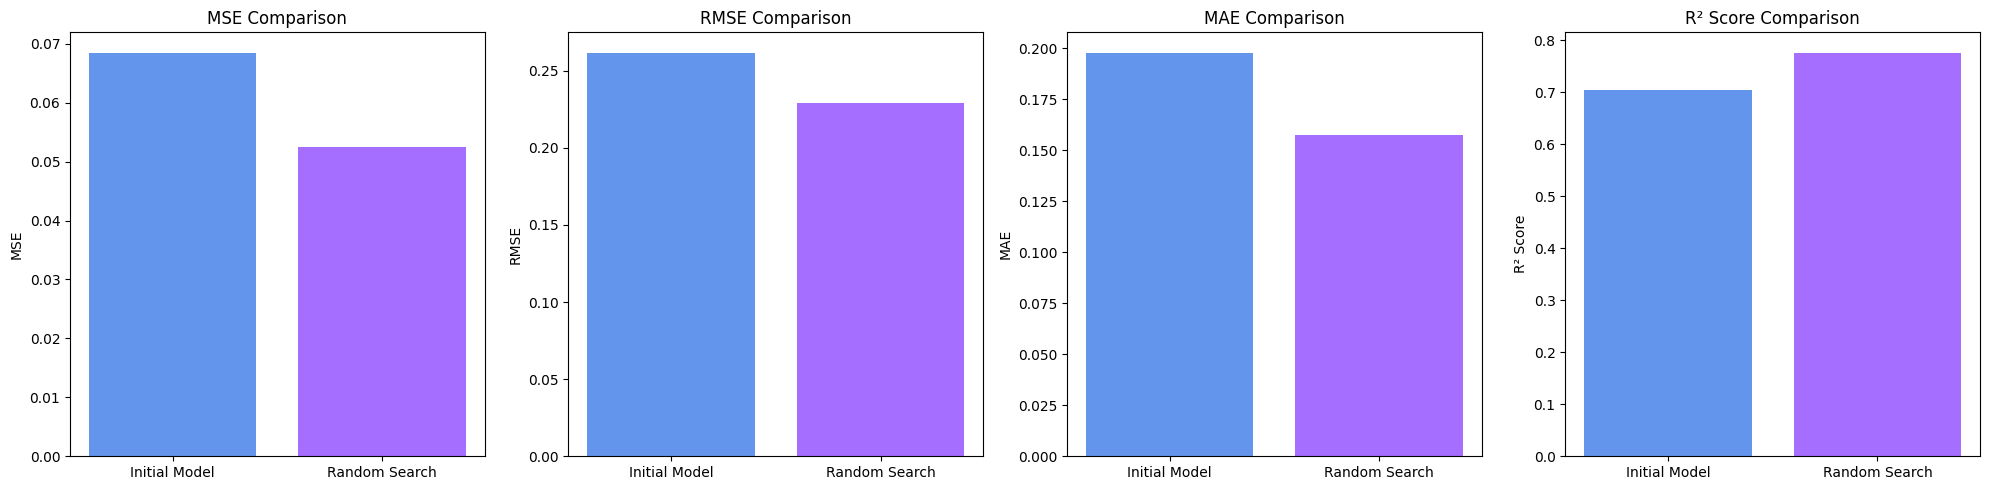

In [40]:
# Performance data
models = ['Initial Model', 'Random Search']
mse_values = [0.0685, 0.0525]
rmse_values = [0.2618, 0.2291]
mae_values = [0.1978, 0.1574]
r2_values = [0.7048, 0.7765]

# Plot MSE, RMSE, MAE, R² in one row
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# MSE Plot
ax[0].bar(models, mse_values, color=['#6495ED', '#a56eff'])
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')

# RMSE Plot
ax[1].bar(models, rmse_values, color=['#6495ED', '#a56eff'])
ax[1].set_title('RMSE Comparison')
ax[1].set_ylabel('RMSE')

# MAE Plot
ax[2].bar(models, mae_values, color=['#6495ED', '#a56eff'])
ax[2].set_title('MAE Comparison')
ax[2].set_ylabel('MAE')

# R² Score Plot
ax[3].bar(models, r2_values, color=['#6495ED', '#a56eff'])
ax[3].set_title('R² Score Comparison')
ax[3].set_ylabel('R² Score')

# Display plots
plt.tight_layout()
plt.show()

The plots above clearly demonstrate the improvements achieved through hyperparameter tuning:

- **MSE** and **RMSE** both show a significant reduction after Random Search, reflecting better accuracy and lower prediction variance.
  
- **MAE** shows the most significant improvement after tuning, with Random Search resulting in the lowest mean absolute error, indicating the highest prediction accuracy.

- **R² Score** increased substantially after Random Search, with the final model explaining over **77%** of the variance in coral bleaching predictions.

These results confirm that **Random Search** provided the best hyperparameter set for the **Random Forest Regressor**, resulting in the most accurate model. Based on these outcomes, this tuned model will be selected as the final model for further evaluation on the test set.

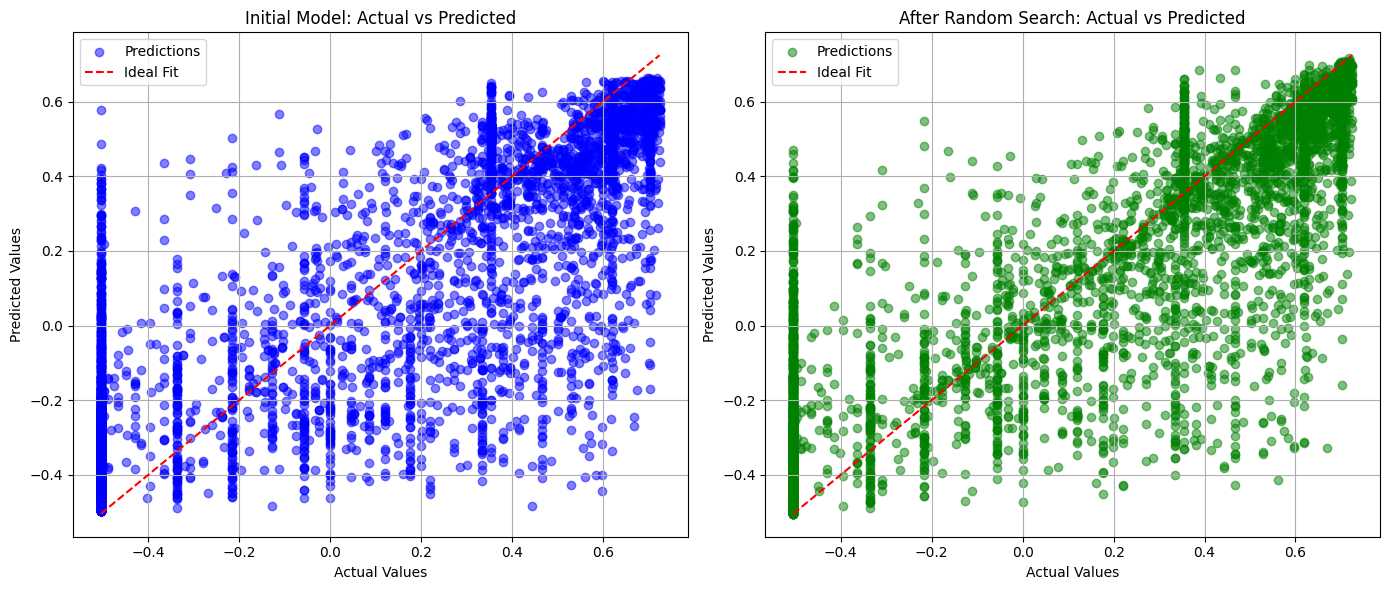

In [43]:
# Scatter plot of actual vs predicted values before and after tuning

# Predictions from the initial model (Random Forest before tuning)
initial_rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
initial_rf_model.fit(X_train, y_train)
initial_pred = initial_rf_model.predict(X_test)

# Predictions from the best model after Random Search
best_rf_model_combined.fit(X_train, y_train)
best_pred = best_rf_model_combined.predict(X_test)

# Plot the actual vs predicted values for both models
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for the initial model
ax[0].scatter(y_test, initial_pred, color='blue', alpha=0.5, label='Predictions')
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')  # Diagonal line
ax[0].set_title('Initial Model: Actual vs Predicted')
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].legend()
ax[0].grid(True)

# Scatter plot for the best model after Random Search
ax[1].scatter(y_test, best_pred, color='green', alpha=0.5, label='Predictions')
ax[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')  # Diagonal line
ax[1].set_title('After Random Search: Actual vs Predicted')
ax[1].set_xlabel('Actual Values')
ax[1].set_ylabel('Predicted Values')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

The scatter plots demonstrate the improvement in model performance after tuning:

- **Before Tuning (Initial Model)**: The scatter plot shows more dispersion around the diagonal line, indicating that the initial model's predictions had larger deviations from the actual values, particularly for higher values of bleaching severity.

- **After Random Search (Tuned Model)**: After hyperparameter tuning with Random Search, the scatter plot shows that the predictions are more tightly clustered around the diagonal line, reflecting improved accuracy and reduced prediction errors.

This visual comparison confirms the significant improvements in the model's ability to predict coral bleaching severity after tuning, particularly in reducing overfitting and improving prediction accuracy for extreme values.

# Conclusion

### <span style='color:#6495ED'>|</span> Summary of Data Exploration</b> 

The initial **Exploratory Data Analysis (EDA)** provided key insights into the structure and distribution of the dataset:
- Irrelevant columns were removed, and missing values were addressed to ensure data integrity.
  
- Key environmental variables such as **Sea Surface Temperature (SST)**, **Temperature Anomalies (SSTA, TSA)**, and coral bleaching percentages showed significant correlations.

These insights guided the **feature engineering** process, focusing on environmental, geographical, and physical stressor features.

### <span style='color:#6495ED'>|</span> Summary of Data Preprocessing</b> 

Key preprocessing steps were applied to optimize the dataset for model building:
- **Feature Engineering**: New features like **Degree Heating Weeks (DHW)**, **SSTA/TSA Frequency**, and interaction terms between environmental variables enhanced predictive power.
- **Encoding**: Categorical variables such as **Ocean Name** and **Bleaching Level** were numerically encoded.
- **Scaling and Normalization**: Numerical features were standardized using **Power Transformer** and **RobustScaler** to ensure consistency.
- **Clustering**: **K-Means** clustering was applied to geographic features to account for regional differences in bleaching patterns.

This preprocessing ensured the dataset was well-structured for model training.

### <span style='color:#6495ED'>|</span> Summary of Model Training and Tuning</b> 

Multiple machine learning models were trained and cross-validated:
- The **Random Forest Regressor** outperformed other models with an initial **R² Score** of 0.7048.
- **Random Search** hyperparameter tuning significantly improved performance, raising the **R² Score** to 0.7765.

The final model was the **Random Forest Regressor** with the following hyperparameters:
```python
OrderedDict({
    'bootstrap': False,
    'max_depth': 30,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 500
})
```

### <span style='color:#6495ED'>|</span> Final Thoughts</b> 

The model successfully identified key environmental drivers of coral bleaching, highlighting the role of **SST**, **thermal anomalies**, and **prolonged heat stress**. Through hyperparameter tuning, the **Random Forest Regressor** emerged as the most effective model, with significant predictive power.